In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/recentyears.csv')
df

,年,月,南半球平均温度,北半球平均温度,热带平均温度,南温带平均温度,北温带平均温度,澳大利亚平均温度,美国平均温度,中国平均温度,印尼平均温度
0,1899,1,22.009579,9.365654,21.927674,17.630000,2.803077,17.741000,1.568667,-1.707529,25.862500
1,1899,2,22.262368,11.469580,23.084116,18.794600,5.104442,20.234500,0.130667,1.557353,25.758000
2,1899,3,22.323000,15.066198,24.859233,17.960200,9.341365,18.914000,4.161667,6.888647,25.947000
3,1899,4,21.079053,19.147469,25.557837,15.182000,14.933654,16.258000,10.742000,13.200118,26.101500
4,1899,5,19.389053,22.827704,25.845907,12.175400,20.099712,12.804500,14.221000,19.062412,26.653500
...,...,...,...,...,...,...,...,...,...,...,...
1481,2022,6,21.267140,29.284586,24.293534,10.665363,23.970267,15.742980,20.533595,18.480379,25.945530
1482,2022,7,20.628030,23.915871,28.604921,11.492332,28.225847,15.515358,23.995589,21.267973,26.066153
1483,2022,8,19.954941,28.666738,25.046134,14.578219,24.382067,17.064545,23.134584,20.095077,26.991987
1484,2022,9,19.289010,25.246634,28.805304,13.482711,22.502592,22.441567,19.256957,14.681354,26.029269


In [35]:
stand_time = np.arange('1899-01', '2022-11', dtype=np.datetime64).astype('M8[M]')
df['dt'] = stand_time
new_df = df.drop(['年', '月'], axis=1)
new_df = new_df[['dt', '南半球平均温度', '北半球平均温度']]
new_df = new_df.loc[new_df['dt']>='2012-01-01']
new_df = new_df.loc[new_df['dt']<='2022-03-01'].reset_index(drop=True)
mean_temp = new_df[['南半球平均温度', '北半球平均温度']].mean(axis=1).to_numpy()
dt_temp_df = new_df[['dt']]
dt_temp_df['mean_temp'] = mean_temp
dt_temp_df

C:\Users\Ty Zhang\AppData\Local\Temp\ipykernel_19996\2539524649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_temp_df['mean_temp'] = mean_temp


,dt,mean_temp
0,2012-01-01,16.462990
1,2012-02-01,17.281249
2,2012-03-01,19.492050
3,2012-04-01,21.101506
4,2012-05-01,22.289437
...,...,...
118,2021-11-01,16.947615
119,2021-12-01,20.676517
120,2022-01-01,15.572492
121,2022-02-01,16.865724


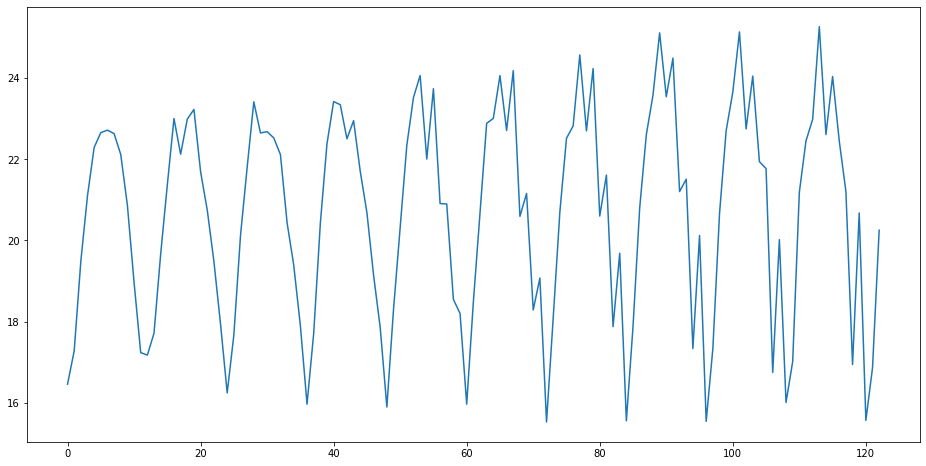

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(dt_temp_df)), dt_temp_df['mean_temp'].to_numpy())
plt.show()

In [41]:
rate = []
for i, temp in enumerate(mean_temp):
    if i+1 < len(mean_temp):
        rate.append((mean_temp[i+1] - temp)/temp)

rate_array = np.array(rate)
rate_array

array([ 0.0497029 ,  0.12793064,  0.08256986,  0.05629605,  0.01644239,
        0.00263505, -0.00368252, -0.02282639, -0.0566046 , -0.09073304,
       -0.09121011, -0.00355806,  0.03139799,  0.10991717,  0.08664636,
        0.07637007, -0.03819765,  0.03900574,  0.01046515, -0.06595181,
       -0.0434685 , -0.06088536, -0.07952882, -0.0942091 ,  0.08765591,
        0.13868262,  0.08328415,  0.07401656, -0.03271711,  0.00141396,
       -0.00680832, -0.01820445, -0.07569205, -0.0512551 , -0.07685618,
       -0.10795864,  0.10901361,  0.15309734,  0.09605431,  0.04628476,
       -0.00332476, -0.03595048,  0.01988785, -0.05443742, -0.0467788 ,
       -0.0742753 , -0.0675218 , -0.10950872,  0.15113188,  0.11021021,
        0.09949778,  0.0526622 ,  0.0229967 , -0.08544478,  0.07873706,
       -0.11914884, -0.00051456, -0.11239801, -0.01862091, -0.12266636,
        0.15729301,  0.11845675,  0.10691401,  0.00533028,  0.0458141 ,
       -0.05619434,  0.06485816, -0.14831141,  0.02735822, -0.13

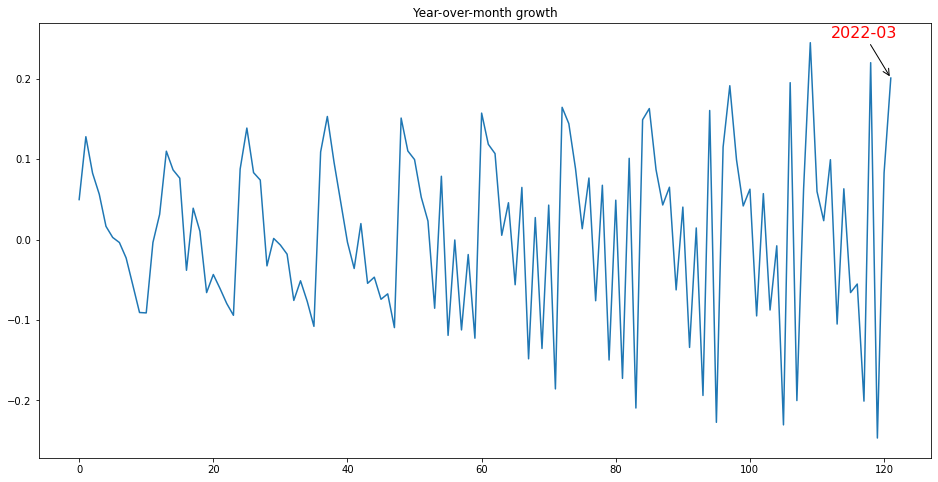

In [58]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(len(rate_array)), rate_array)
plt.annotate("2022-03", xy=(len(rate_array)-1, rate_array[-1]), xycoords='data', color='r', fontsize=16, 
             xytext=(len(rate_array)-10, rate_array[-1]+0.05), arrowprops=dict(arrowstyle='->')) 
plt.title('Year-over-month growth')
plt.show()